# BUSINESS CASE: AEROFIT 

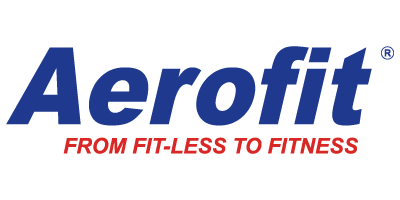

## Problem statement and analysis of basic matrix

## Problem Statement:

### To identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. And to perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. Also for each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
aerofit = pd.read_csv(r"C:\Users\VINAY\Desktop\Aerofit_treadmill.csv")
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### Data imported from 'Aerofit_treadmill.csv' file 

## Observations: 

### Shape of the data

In [3]:
aerofit.shape

(180, 9)

### Data types of all the attributes 

In [4]:
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Statistical summary of data 

In [5]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### With the help of above statistical summary, came to know about average, min, max, median etc. of the attributes like Age, Education, Treadmill usage, Income and avg. number of miles customer expects to walk each week. 

In [6]:
aerofit.describe(include="object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


## Non-graphical analysis: value counts and unique attributes


In [7]:
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [8]:
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [9]:
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [10]:
aerofit['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [11]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [12]:
aerofit['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [13]:
aerofit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [14]:
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [15]:
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

## Missing values and outlier detection: 

In [16]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [17]:
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Visual Analysis: 
### Univariate Analysis

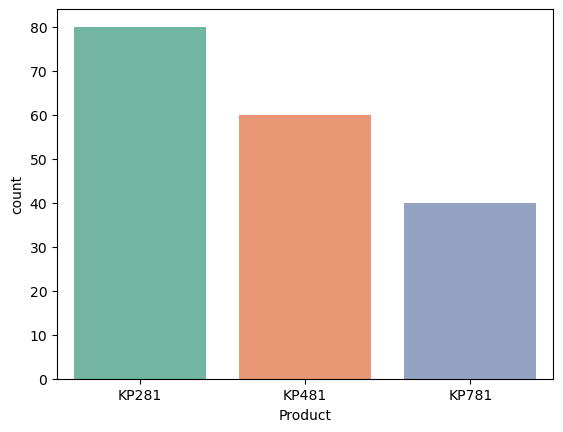

In [18]:
sns.countplot(data=aerofit,x='Product', palette='Set2')
plt.show()

### More numbers of customers purchased KP281 followed by KP481 and KP781 

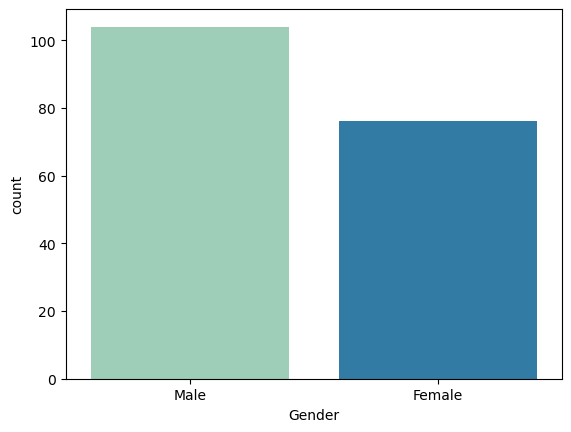

In [19]:
sns.countplot(data=aerofit, x="Gender", palette='YlGnBu')
plt.show()

### Customers who are male are greater in numbers than female customers 

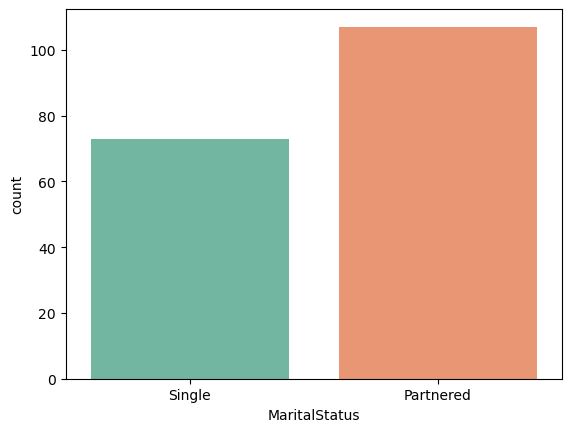

In [20]:
sns.countplot(data=aerofit, x='MaritalStatus', palette='Set2')
plt.show()

### Partnered customers purchased more treadmills than single customers combined 

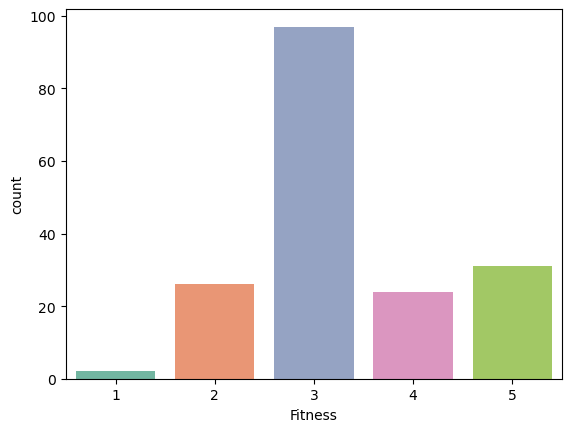

In [21]:
sns.countplot(data=aerofit, x="Fitness", palette='Set2')
plt.show()

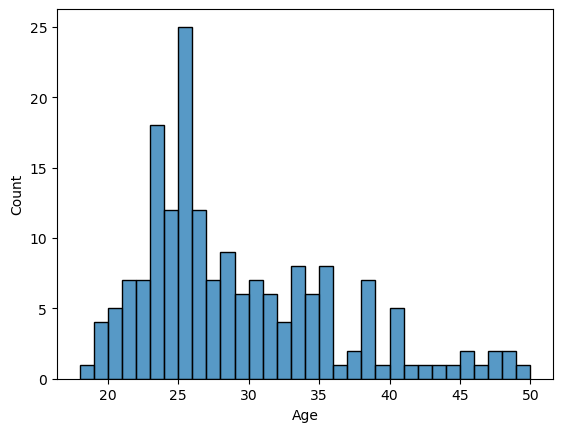

In [22]:
sns.histplot(data=aerofit, x='Age', binwidth=1, palette='Set2')
plt.show()

### Bivariate Analysis 

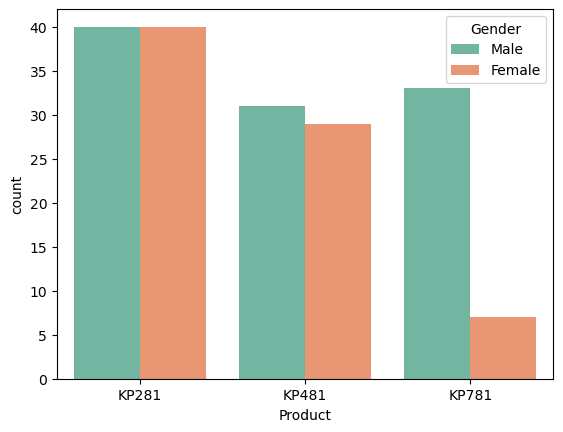

In [23]:
sns.countplot(data=aerofit, x='Product', hue='Gender', palette='Set2')
plt.show()

### Most common preference for both gender is KP281.
### Males have bought more KP781 compare to KP481. 

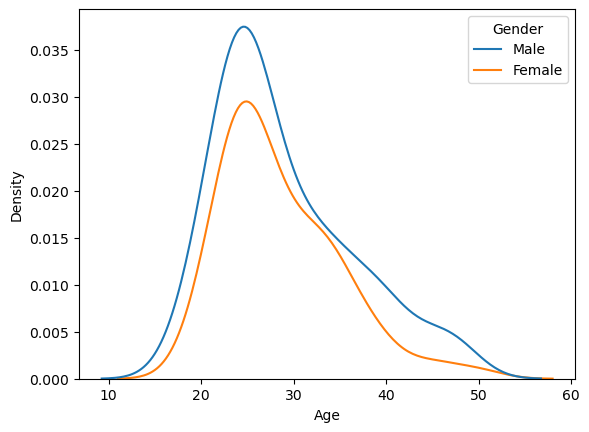

In [24]:
sns.kdeplot(data=aerofit, x='Age', hue='Gender')
plt.show()

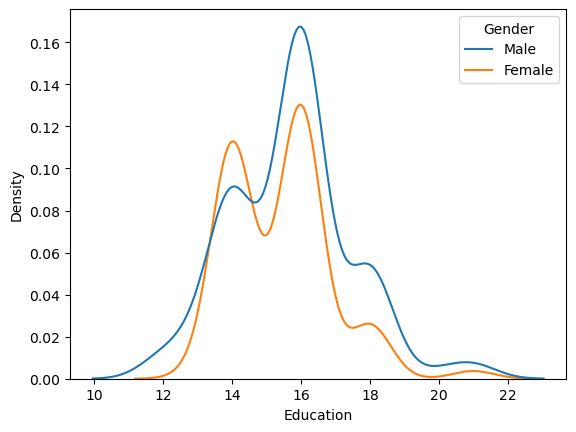

In [25]:
sns.kdeplot(data=aerofit, x='Education', hue='Gender')
plt.show()

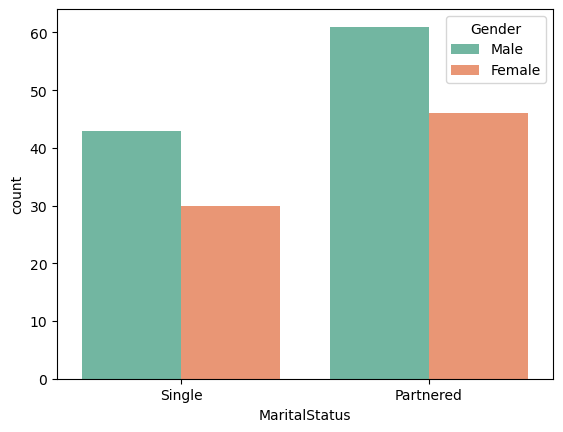

In [26]:
sns.countplot(data=aerofit, x='MaritalStatus', hue='Gender', palette='Set2')
plt.show()
     

### Irrespective of Martial Status, Men are the most frequent buyer of the treadmill.
### Partnered female are more frequent buyers compare to Single females. 

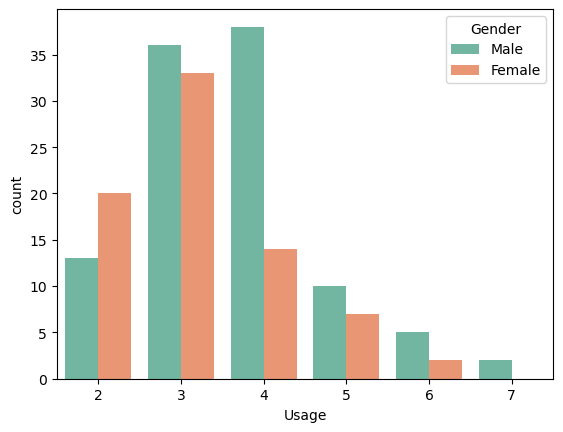

In [27]:
sns.countplot(data=aerofit, x='Usage', hue='Gender', palette='Set2')
plt.show()

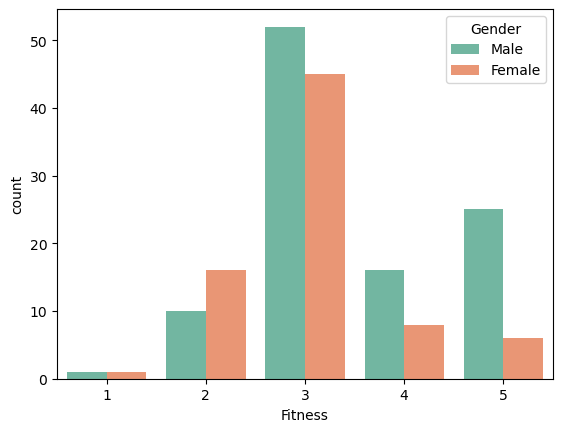

In [28]:
sns.countplot(data=aerofit, x='Fitness', hue='Gender', palette='Set2')
plt.show()

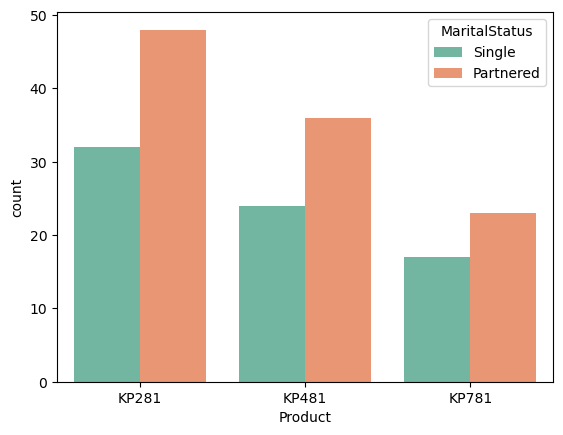

In [29]:
sns.countplot(data=aerofit, x="Product", hue='MaritalStatus', palette='Set2')
plt.show()

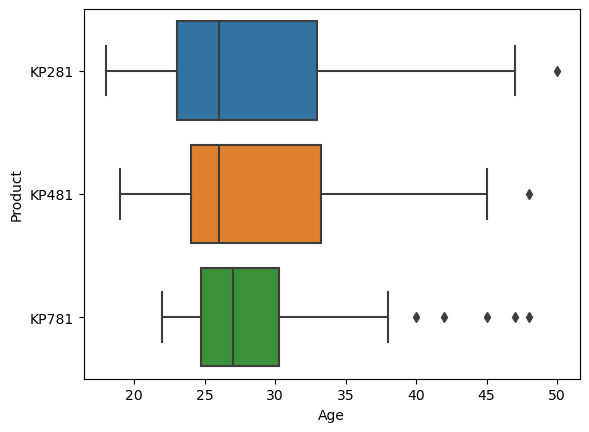

In [33]:
 sns.boxplot(data = aerofit, x=aerofit['Age'], y=aerofit['Product'])
 plt.show()

### Age distribution in KP281 is maximum, followed by KP481, and KP781 respectively. Some outliers were observed in KP781. Median of KP281 and KP481 are almost same. 

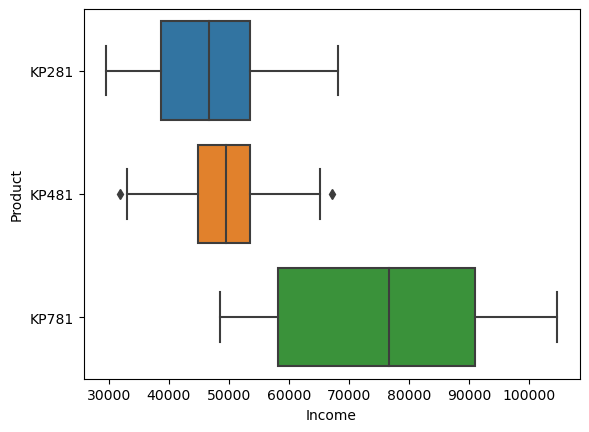

In [35]:
 sns.boxplot(data = aerofit, x=aerofit['Income'], y=aerofit['Product'])
 plt.show()

### Income distribution of KP281 and KP481 is almost same (slightly less of KP481). Customers from higher income group (income greater than 50k doller) tend to by KP781, which is advanced treadmill model. Here we can obser that interquartile range of KP781 is much higher than KP281 and KP481

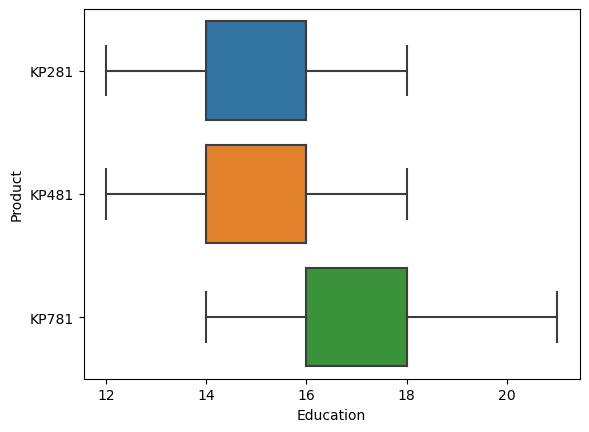

In [36]:
 sns.boxplot(data = aerofit, x=aerofit['Education'], y=aerofit['Product'])
 plt.show()

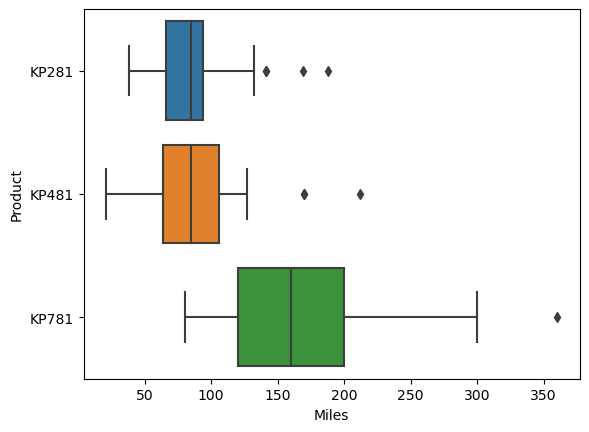

In [37]:
 sns.boxplot(data = aerofit, x=aerofit['Miles'], y=aerofit['Product'])
 plt.show()

### The customers who buys KP781 expects to walk more number of miles than the customers who baught KP281 and KP481 models. Here we can observe some outliers in this boxplot 

### Marginal Probability:

In [43]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [38]:
((pd.crosstab(aerofit["Product"],aerofit["Gender"],margins=True))/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


### From the above table we can state that,

### Probability of Male Customer Purchasing any product is : 57.77 %

### Probability of Female Customer Purchasing any product is : 42.22 %

### Marginal Probability of any customer buying follwing products is,

### product KP281 is : 44.44 % (cheapest / entry level product)

### product KP481 is : 33.33 % ( for intermediate users)

### product KP781 is : 22.22 % ( product for extensive use who run/walk more miles)

###

### Conditional probability:

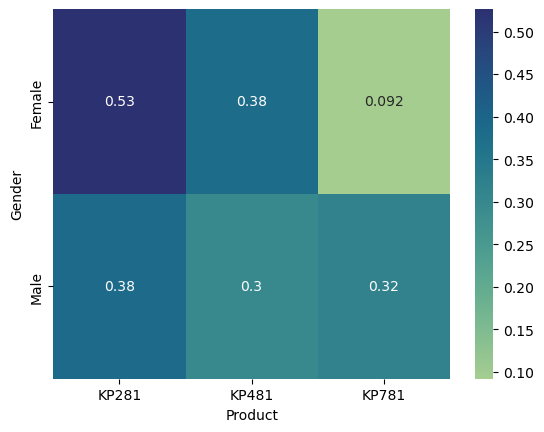

In [40]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index'), annot=True, cmap='crest')
plt.show()

### From the above heatmap we can say,

### Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.

### Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.

### Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

### Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.

### Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.

### Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.

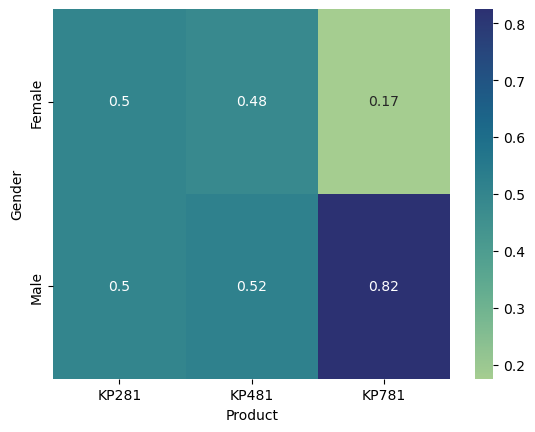

In [41]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='columns'), annot=True, cmap='crest')
plt.show()

### Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.

### Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.

### Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.

### Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.

### Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.

### Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17. 

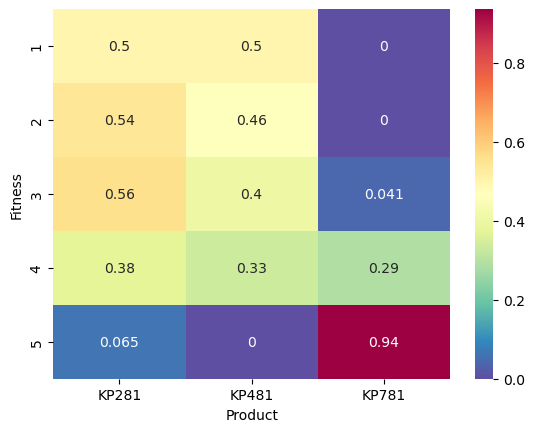

In [42]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

### Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
### Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
### Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 0.94.
### Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
### Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 0.33.
### Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
### Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
### Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
### Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
### Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
### Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
### Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
### Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
### Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
### Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event). 

## Customer Profiling - Categorization of users

### Model KP281: 

### 1. Most affordable and entry level and Maximum Selling Product.
### 2.This model popular amongst both Male and Female customers
### 3.Same number of Male and Female customers.
### 4.Customers walk/run average 70 to 90 miles on this product.
### 5.Customers use 3 to 4 times a week
### 6.Fitness Level of this product users is Average.
### 7.More general purpose for all age group and fitness levels.
###

### Model KP481:  

### 1. KP481 is the second most product sold, contributing 33.33% of sales.
### 2. The mean income of KP481 buyers is 49K dollars.
### 3. The mean planned usage of KP481 is three times per week.
### 4. The mean fitness rating of KP481 is 3.
### 5. There are slightly more male buyers of the KP481 model.
### 6. More couples buy KP481 than single customers.
### 7. The age range of KP481 treadmill customers is roughly between 24-34 years.
### 8. The income range of KP481 treadmill customers is roughly between 45K - 53K dollars.
### 9. The education years range of KP481 is the same as KP281, i.e 14 - 16 years.
###

### Model KP781: 

### 1. KP781 is a rarely bought treadmill model because it is expensive.
### 2. The mean income of KP781 buyers is 75.4K dollars.
### 3. The mean planned usage of KP781 customers is 4.
### 4. The mean fitness rating of KP781 buyers is 4.
### 5. KP781 is the most preferred among males, while very few females buy KP781. 
### 6. KP781 is not popular among singles and partnered marital status. 
### 7. The age range of KP781 buyers is roughly between 25-30 years. 
###

## Conclusion:


###  1.KP281 is the most purchased product, followed by KP481 & KP781
### 2.There are more Male buyers than Female.
### 3.There are more Parterned buyers than Single customers.
### 4.Average age of customers is 28, the maximum is 50 years, the minimum is 18 years, and the median is 26 years.
### 5.Average education age of customers is 15.5 years, the maximum is 21 years, the minimum is two years, and the median is 16 years.
### 6.Average treadmill planning usage is three times per week, the maximum usage is seven times per week, the minimum usage is two times per week, and the median usage is three times per week.
### 7.Average self-fitness rating of the user is 3, the maximum rating is 5, the minimum rating is 1, and the median rating is 3.
### 8.Average annual income of the customers is 53.7K dollers, the maximum is 104K dollars, the minimum is 29.5K dollars, and the median income is 50.5K dollars.
### 9.The Average distance travelled by the customer either by walking or running is 103 miles, the maximum is 360 miles, the minimum is 21 miles, and the median is 94 miles.
### 10.The education years difference between 25th & 75th percentile is two years only.
### 11.Most customers use the treadmill 3-4 times per week, while very few people walk/run 6-7 times per week.
### 12.The vast majority of people have rated themselves as moderately fit.
### 13.The Mean income of KP281 buyers is 46.4K dollars, while KP481 buyers have an income of 48.9K dollars, and KP781 buyers have an income of 75.4K dollars.
### 14.The Mean usage of KP281 and KP481 is the same i.e. 3, while KP781 is 4.
### 15.The Mean fitness of customers buying KP281 & KP481 is 3, while the KP781 fitness rating is 4.6.
### 16.KP781 is the most preferred treadmill of males, while the female gender prefers it very least.
### 17.Overall Male tend to use more treadmills.
### 18.Income distribution of both genders is roughly the same.
### 19.Partnerned status is fitter than singles.

## Recommendations:


### 1. We can add some features in treadmills that will be useful for women to attract more women consumers
### 2. We can start new campaign with national women runner icon to promote treadmills to women
### 3. As there are more features and functionality in KP781 model and its cost is higher than other two models, we can promote this model to customers with higher income group and athletes
### 4. We can sponsor national level sports events to promote KP781 model to athletes and aspiring athletes, it will also increase sales and revenue.
### 5. We can add 'Streak' like feature in treadmill, that will help to improve consistancy of user.
### 6. We can run TV advertisement, which will depict the health benefits regular walking and running; like it will help improve diabetes, high BP (which may help increase customer above 50 age group). The advertisement will also mention that if user have a treadmill then he/she can exercise daily irrespective of outside weather condition.